In [28]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import json
import os

from MD.get_person_voice import get_features_from_file

os.chdir(r'D:\Py_Projects\neuro')

In [3]:
with open('models/statistic/DTDNNSS_100p_5vox_002.json', 'r') as f:
    dtdnnss40 = json.load(f)

with open('models/statistic/DeepSpeaker_100pers_10vox_20mfcc_tripl_011.json', 'r') as f:
    dtdnnss20_100 = json.load(f)
    
with open('models/statistic/DTDNNSS_50p_5vox_004.json', 'r') as f:
    dtdnnss20 = json.load(f)
    
with open('models/statistic/ResNet34_100p_5vox_001.json', 'r') as f:
    resnet1 = json.load(f)   
    
with open('models/statistic/DTDNNSS_100p_5vox_05c.json', 'r') as f:
    dtdnnss30 = json.load(f) 

with open('models/statistic/DTDNNSS_50p_5vox_007.json', 'r') as f:
    dtdnnss40_01 = json.load(f) 
    
with open('models/statistic/DTDNNSS_50p_5vox_006_lr01.json', 'r') as f:
    dtdnnss20_lr = json.load(f) 
    
with open('models/statistic/ResNet34_50p_5vox_002.json', 'r') as f:
    resnet2 = json.load(f) 

In [4]:
start = 0
dtdnnss20_df = pd.DataFrame([*dtdnnss20.values()][start:-1])
dtdnnss30_df = pd.DataFrame([*dtdnnss30.values()][start:-1])
dtdnnss40_df = pd.DataFrame([*dtdnnss40.values()][start:-1])
dtdnnss40_01_df = pd.DataFrame([*dtdnnss40_01.values()][start:-1])
dtdnnss20_lr_df = pd.DataFrame([*dtdnnss20_lr.values()][start:-1])
resnet1_df = pd.DataFrame([*resnet1.values()][start:-1])
resnet2_df = pd.DataFrame([*resnet2.values()][start:-1])

<Axes: >

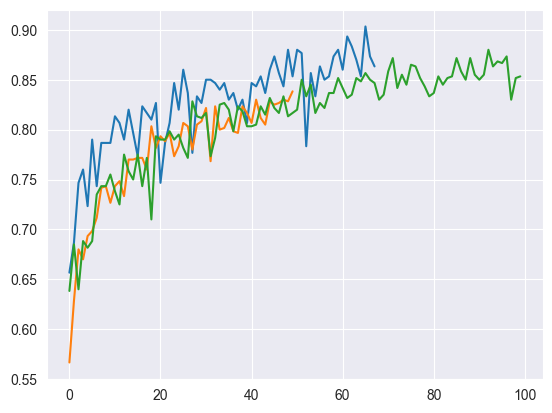

In [7]:
dtdnnss20_df['epoch_acc_val'].plot()
dtdnnss30_df['epoch_acc_val'].plot()
dtdnnss40_df['epoch_acc_val'].plot()
# dtdnnss40_01_df['epoch_acc_val'].plot()
# dtdnnss20_lr_df['epoch_acc_val'].plot()
# resnet1_df['epoch_acc_val'].plot()
# resnet2_df['epoch_acc_val'].plot()

<Axes: >

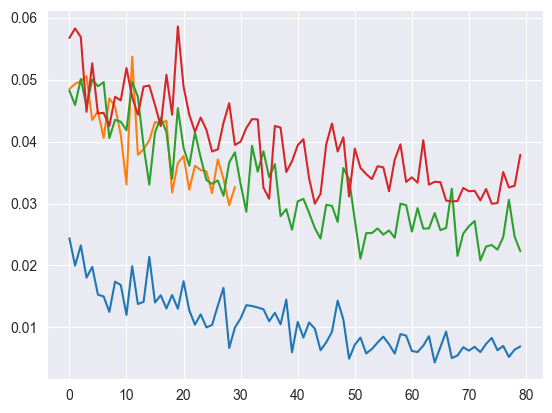

In [7]:
dtdnnss20_df['epoch_loss_val'].plot()
dtdnnss30_df['epoch_loss_val'].plot()
dtdnnss40_df['epoch_loss_val'].plot()
resnet1_df['epoch_loss_val'].plot()

In [3]:
with open('voice_params/v10_voice_params_100pers_10vox.json', 'r') as f:
    model_params = json.load(f)

In [17]:
import torch
import torchaudio

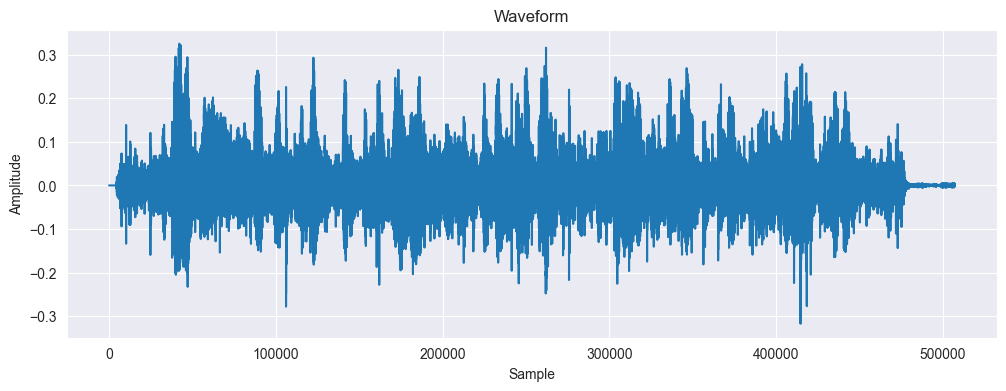

In [29]:
audio_file = r'D:\Py_Projects\neuro\output\wav_voices\Roma\3.wav'
waveform, sample_rate = torchaudio.load(audio_file)

# Отображение аудиоволны
plt.figure(figsize=(12, 4))
plt.plot(waveform.t().numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.savefig(r'pictures/waveform_roma3_raw.png')
plt.show()

In [24]:
with open('voice_params/v3_voice_params_100pers_5vox.json', 'r') as f:
    model_params = json.load(f)

get_features_from_file(audio_file, model_params,save_clear_audio_path=r'D:\Py_Projects\neuro\output\clear_Radmir_3.wav')

(None, None)

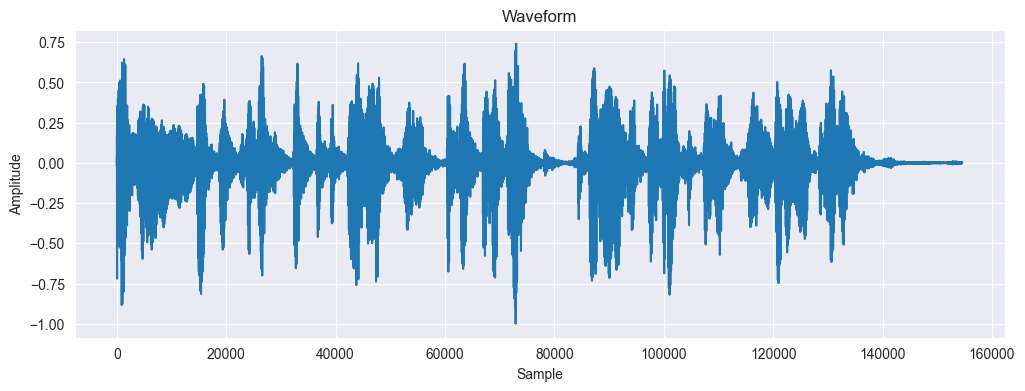

In [30]:
audio_file = r'D:\Py_Projects\neuro\output\clear_Roma_3.wav'
waveform, sample_rate = torchaudio.load(audio_file)

# Отображение аудиоволны
plt.figure(figsize=(12, 4))
plt.plot(waveform.t().numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.savefig(r'pictures/waveform_roma3_clear.png')
plt.show()

In [25]:
audio_file = r'D:\Py_Projects\neuro\output\wav_voices\Roma\3.wav'
_, spec = get_features_from_file(audio_file, model_params, spectrogram=True)

In [37]:
from torchvision.transforms import transforms

mean = 0.485
std = 0.229

# Преобразуем спектрограмму в тензор
spec_tensor = torch.from_numpy(spec).float()

In [38]:
spec_tensor.shape

torch.Size([1, 513, 302])

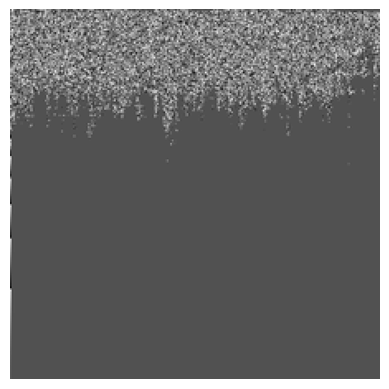

In [43]:
from PIL import Image

# Изменяем порядок измерений на (каналы, высота, ширина)
# spec_tensor = spec_tensor.permute(2, 0, 1)

# Применяем трансформацию
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224), interpolation=Image.LANCZOS),
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean], std=[std])
])

# Применяем трансформацию к спектрограмме
pil_image = transform(spec_tensor)

# Отображение изображения
plt.imshow(pil_image.permute(1, 2, 0), cmap='gray')
plt.axis('off')
plt.savefig(r'pictures/spectro_roma3.png')
plt.show()